# XOR Neural Network

## Опис алгоритму:
Спробуйте розібратися з основами реалізації нейронної мережі для вирішення завдання XOR. Для цього вам потрібно самостійіно реалізувати деякі функії:
- `sigmoid` - функція активації
- `sigmoid_derivative` - похідна функції активації
- `forward_propagation` - передбачення моделі
- `loss_derivative` - функція втрат
- `loss_curve` - функція для візуалізації зміни значення функції втрат.

Все інше вам дано, готова основна функція `train`, яка реалізує алгоритм зворотнього поширення помилки.
Ви можете змінювати параметри нейронної мережі, щоб покращити результат. Необхідно 2 вхідних нейрони, 1 вихідний, достаньо 1 прихованого шару з 2 нейронами.

Для того аби більше дізнатися про нейронні мережі, та сам алгоритм зворотнього поширення помилки, рекомендую переглянути це прекрасне відео: https://www.youtube.com/watch?v=Ilg3gGewQ5U

## Набір даних:
Використовуйте простий набір даних для виконання завдання XOR. Наприклад, можна створити набір з чотирьох можливих комбінацій входів і відповідних вихідних значень.

| Input A | Input B | Output (XOR) |
|---------|---------|--------------|
|    0    |    0    |      0       |
|    0    |    1    |      1       |
|    1    |    0    |      1       |
|    1    |    1    |      0       |

In [1]:
import numpy as np

data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([[0], [1], [1], [0]])

## Архітектура нейронної мережі:
Розгляньте просту архітектуру для вирішення задачі XOR. Нейронна мережа повинна мати вхідний шар, прихований шар і вихідний шар.

In [2]:
num_inputs = 2
num_hidden = 2
num_outputs = 1

## Математика за нейронними мережами:
Як вже будо згадано вище, основою всього є алгоритм зворотнього поширення помилки (backpropagation). Основна його ціль - мінімізувати фукцію втрат(loss function). Для цього використовується градієнтний спуск (gradient descent). Про сам градієнт будете вивчати під час другуго семестру).
Цей алгоритм використовується для знаходження локального мінімуму функції втрат. Це означає, що ми шукаємо такі значення ваг, при яких функція втрат буде мати найменше значення. Для цього ми використовуємо похідну функції втрат по вагам. Це дозволяє нам змінювати значення вагів так, щоб функція втрат зменшувалась. Цей процес повторюється до тих пір, поки функція втрат не досягне мінімуму.

Хороше відео про градієнтний спуск: https://www.youtube.com/watch?v=IHZwWFHWa-w

### Ланцюжкове правило (chain rule):
Рахувати похідну для кожної змінної окремо - дуже складно. Тому ми використовуємо ланцюжкове правило (chain rule). Грубо кажучи, ми рахуємо похідну функції втрат по кожному шару нейронної мережі, починаючи з останнього. Це дозволяє нам знайти похідну функції втрат по вагам кожного шару. І використовуючи градієнтний спуск, ми змінюємо значення ваг так, щоб функція втрат зменшувалась.

Добре пояснення також у вищезгаданому відео: https://www.youtube.com/watch?v=Ilg3gGewQ5U

### Функція втрат (loss function):
Функція втрат - це функція, яка визначає, наскільки добре працює наша модель. Чим менше значення функції втрат, тим краще працює модель. Для вирішення задачі XOR ми використовуємо квадратичну функцію втрат. Це просто значення квадратів різниць між прогнозованими і фактичними значеннями.

Cost functuion: $C = \frac{1}{2}(\hat{y} - y)^2$

### Функція активації та параметри нейрона (activation function):
Як саме мережа буде передавати значення від одного шару до іншого? Як взагалі працює нейрон? Нейрон - це просто функція, яка приймає вхідні значення, виконує деякі обчислення і повертає вихідне значення. Ці обчислення включають в себе додавання вхідних значень, множення на ваги і додавання зміщення (bias). Після цього значення проходить через функцію активації. Це дозволяє нейрону вирішувати нелінійні задачі. 

Нехай $x_1, ..., x_k$ - вхідні значення, $w_1, ..., w_k$ - ваги, $b$ - зміщення, $f$ - функція активації. Тоді вихід нейрона буде рівним $f(x_1w_1 + ... + x_kw_k + b)$.

Хороша стаття про функції активації: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

Існує багато різних функцій активації. Вони використовуються для різних задач. Наприклад, для задач класифікації використовують функцію активації softmax. Для задач регресії - лінійну функцію активації. Для вирішення задач XOR ми використовуємо сигмоїдальну функцію активації. Вона виглядає так: $f(x) = \frac{1}{1 + e^{-x}}$. До того ж, дана функція хороша тим, що її областю значень є $(0, 1)$.

## Реалізація алгоритму на Python:


<?xml version="1.0" encoding="UTF-8"?>
<!-- Do not edit this file with editors other than draw.io -->
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" version="1.1" width="432px" height="191px" viewBox="-0.5 -0.5 432 191" class="ge-export-svg-dark" content="&lt;mxfile host=&quot;app.diagrams.net&quot; modified=&quot;2023-11-24T12:49:22.466Z&quot; agent=&quot;Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36&quot; etag=&quot;APl0wJugyGrk2QD_2ts9&quot; version=&quot;22.1.3&quot; type=&quot;google&quot;&gt;&lt;diagram name=&quot;Page-1&quot; id=&quot;42789a77-a242-8287-6e28-9cd8cfd52e62&quot;&gt;7Zpbb9owFMc/DY+bkpiQ5LGBtpu0ddUqbfTRJCZYNTEyBkI//Wxi5wos5Va25gn72OckPv+fL3LogP40uWdwNvlOQ0Q6lhEmHTDoWJZp2Ib4kZZ1arFBNzVEDIeqU254wq9IeyrrAodoXurIKSUcz8rGgMYxCnjJBhmjq3K3MSXlp85ghGqGpwCSuvU3DvlEWU3DyBu+IBxN1KNdPeARDF4iRhexel5MY5S2TKEOo7rOJzCkq4IJ3HZAn1HK09I06SMi06ozlvrd7WjNXpmhmDdyQBCYjuMZoRVAzwWfnDTCEpKFSoN6Ub7WeRERhASi4q8mmKOnGQxky0pQIGwTPiWiZoriJgVIPskQtWyosimgUxyoBgJHiPhZzvqUUCaaNlkTbpzRl0wA6TumMb+DU0wkV78QC2EMlVlBZIo8+pDgKBaVQKQCiYB+PTcqXUvEOEoKJpWre0SniLO16KJabe2ikDYdpeMqB8SxU9OkgEbPU1gqJKMscq6NKCh5GkrltlLtlcooSQW6biOpHOsMUnmtVHukAhWp3nVW6d2n1aqRVqDrNZtW5jm0Mlut9mjVc8taWb1m80pPv2O0in48Pnx7cPreKBnewq9LDqyfzeZWHN7Iw5vMBYHzuUz8bplQgvlQtcjys7R/tlVtkBS6Dda6EouxDIuVgpes5m6bmvZLXxWFtVNjTaI5XbBA99qxF3DIIsR39HG261rQTZ81i7ppG0MEcrwsv+Y2MdUTHikWA8h3TrM6xSs8pMNTXsXDZTVQr8KfVwmU5qAWaMNWNuwjcGuyPByP2wGwmZdBTQvZsnZ+1qxLsGYesrBdz7LmtqidAjXQ7qLNlraWt5Pw1r1i3i5Dm9MANnPHYbyl7W202ddL24WObe7Hoa1XDWRcmLbe32mbT+BMFscEJQo7/40Enn2v3MuK956oZHH0eqK3k7eiAsxqoAuj0uDTyD+PimlcEyvAOZCVd9/EGnybOQErB2xsJ9qi/pPtx62uKZ59UU70ZXqJkx4R2fJHohDJwrO2iCdkxhpNHCW8zErtRlleHOMAkhvVMMVhKN19hub4FY42oSQjMzncTQJsv2MPZKwFp3N1W53dcleuvseYkIpJDa56Yb0Ft5132I5rlxXSCBVIA1tIA8ZuqI66w7a2XSpWJBuaH1ozq1ueVdu+53UvqpnVavZGzQA4m2aimv/BJV1J8z8Qgds/&lt;/diagram&gt;&lt;/mxfile&gt;"><defs><style type="text/css">svg.ge-export-svg-dark &gt; * { filter: invert(100%) hue-rotate(180deg); }&#xa;svg.ge-export-svg-dark image { filter: invert(100%) hue-rotate(180deg) }</style></defs><g><ellipse cx="238.88" cy="25.88" rx="28.125" ry="25.875" fill="#000000" stroke="#000000" stroke-width="0.75" pointer-events="all" transform="translate(1.5,2.25)" opacity="0.25"/><ellipse cx="238.88" cy="25.88" rx="28.125" ry="25.875" fill="rgb(255, 255, 255)" stroke="rgb(0, 0, 0)" stroke-width="0.75" pointer-events="all"/><ellipse cx="238.13" cy="160.5" rx="28.125" ry="27" fill="#000000" stroke="#000000" stroke-width="0.75" pointer-events="all" transform="translate(1.5,2.25)" opacity="0.25"/><ellipse cx="238.13" cy="160.5" rx="28.125" ry="27" fill="rgb(255, 255, 255)" stroke="rgb(0, 0, 0)" stroke-width="0.75" pointer-events="all"/><ellipse cx="88.13" cy="25.88" rx="28.125" ry="25.875" fill="#000000" stroke="#000000" stroke-width="0.75" pointer-events="all" transform="translate(1.5,2.25)" opacity="0.25"/><ellipse cx="88.13" cy="25.88" rx="28.125" ry="25.875" fill="rgb(255, 255, 255)" stroke="rgb(0, 0, 0)" stroke-width="0.75" pointer-events="all"/><ellipse cx="88.13" cy="160.88" rx="28.125" ry="26.625" fill="#000000" stroke="#000000" stroke-width="0.75" pointer-events="all" transform="translate(1.5,2.25)" opacity="0.25"/><ellipse cx="88.13" cy="160.88" rx="28.125" ry="26.625" fill="rgb(255, 255, 255)" stroke="rgb(0, 0, 0)" stroke-width="0.75" pointer-events="all"/><ellipse cx="358.13" cy="93.75" rx="28.125" ry="26.25" fill="#000000" stroke="#000000" stroke-width="0.75" pointer-events="all" transform="translate(1.5,2.25)" opacity="0.25"/><ellipse cx="358.13" cy="93.75" rx="28.125" ry="26.25" fill="rgb(255, 255, 255)" stroke="rgb(0, 0, 0)" stroke-width="0.75" pointer-events="all"/><path d="M 116.25 25.88 L 205.97 25.88" fill="none" stroke="rgb(0, 0, 0)" stroke-width="0.75" stroke-miterlimit="10" pointer-events="stroke"/><path d="M 209.91 25.88 L 204.66 28.5 L 205.97 25.88 L 204.66 23.25 Z" fill="rgb(0, 0, 0)" stroke="rgb(0, 0, 0)" stroke-width="0.75" stroke-miterlimit="10" pointer-events="all"/><path d="M 108.02 142.06 L 215.39 47.32" fill="none" stroke="rgb(0, 0, 0)" stroke-width="0.75" stroke-miterlimit="10" pointer-events="stroke"/><path d="M 218.35 44.72 L 216.15 50.16 L 215.39 47.32 L 212.67 46.22 Z" fill="rgb(0, 0, 0)" stroke="rgb(0, 0, 0)" stroke-width="0.75" stroke-miterlimit="10" pointer-events="all"/><path d="M 108.02 44.16 L 214.79 138.13" fill="none" stroke="rgb(0, 0, 0)" stroke-width="0.75" stroke-miterlimit="10" pointer-events="stroke"/><path d="M 217.74 140.73 L 212.07 139.23 L 214.79 138.13 L 215.54 135.29 Z" fill="rgb(0, 0, 0)" stroke="rgb(0, 0, 0)" stroke-width="0.75" stroke-miterlimit="10" pointer-events="all"/><path d="M 116.25 160.88 L 205.22 160.52" fill="none" stroke="rgb(0, 0, 0)" stroke-width="0.75" stroke-miterlimit="10" pointer-events="stroke"/><path d="M 209.16 160.5 L 203.92 163.15 L 205.22 160.52 L 203.9 157.9 Z" fill="rgb(0, 0, 0)" stroke="rgb(0, 0, 0)" stroke-width="0.75" stroke-miterlimit="10" pointer-events="all"/><path d="M 267 25.88 L 334.44 72.35" fill="none" stroke="rgb(0, 0, 0)" stroke-width="0.75" stroke-miterlimit="10" pointer-events="stroke"/><path d="M 337.68 74.59 L 331.87 73.77 L 334.44 72.35 L 334.85 69.45 Z" fill="rgb(0, 0, 0)" stroke="rgb(0, 0, 0)" stroke-width="0.75" stroke-miterlimit="10" pointer-events="all"/><path d="M 266.25 160.5 L 334.4 115.08" fill="none" stroke="rgb(0, 0, 0)" stroke-width="0.75" stroke-miterlimit="10" pointer-events="stroke"/><path d="M 337.67 112.9 L 334.76 118 L 334.4 115.08 L 331.85 113.63 Z" fill="rgb(0, 0, 0)" stroke="rgb(0, 0, 0)" stroke-width="0.75" stroke-miterlimit="10" pointer-events="all"/><path d="M 8.38 36.67 L 7.37 29.23 L 45 24.13 L 43.94 16.32 L 59.63 25.93 L 47.07 39.36 L 46.01 31.56 Z" fill="none" stroke="rgb(0, 0, 0)" stroke-width="0.75" stroke-miterlimit="10" pointer-events="all"/><path d="M 7.31 156.76 L 8.43 149.35 L 46.09 155 L 47.26 147.21 L 59.63 160.82 L 43.81 170.2 L 44.98 162.41 Z" fill="none" stroke="rgb(0, 0, 0)" stroke-width="0.75" stroke-miterlimit="10" pointer-events="all"/><path d="M 386.63 97.5 L 386.63 90 L 412.88 90 L 412.88 82.13 L 427.13 93.75 L 412.88 105.38 L 412.88 97.5 Z" fill="none" stroke="rgb(0, 0, 0)" stroke-width="0.75" stroke-miterlimit="10" pointer-events="all"/><rect x="408.75" y="60" width="22.5" height="22.5" fill="none" stroke="none" pointer-events="all"/><g transform="translate(-0.5 -0.5)scale(0.75)"><switch><foreignObject pointer-events="none" width="134%" height="134%" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility" style="overflow: visible; text-align: left;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: flex; align-items: unsafe center; justify-content: unsafe center; width: 1px; height: 1px; padding-top: 95px; margin-left: 560px;"><div data-drawio-colors="color: rgb(0, 0, 0); " style="box-sizing: border-box; font-size: 0px; text-align: center;"><div style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; pointer-events: all; white-space: nowrap;"><b>Y</b></div></div></div></foreignObject><text x="560" y="99" fill="rgb(0, 0, 0)" font-family="Helvetica" font-size="12px" text-anchor="middle">Y</text></switch></g><rect x="0" y="0" width="30" height="22.5" fill="none" stroke="none" pointer-events="all"/><g transform="translate(-0.5 -0.5)scale(0.75)"><switch><foreignObject pointer-events="none" width="134%" height="134%" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility" style="overflow: visible; text-align: left;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: flex; align-items: unsafe center; justify-content: unsafe center; width: 1px; height: 1px; padding-top: 15px; margin-left: 20px;"><div data-drawio-colors="color: rgb(0, 0, 0); " style="box-sizing: border-box; font-size: 0px; text-align: center;"><div style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; pointer-events: all; white-space: nowrap;"><b>X1</b></div></div></div></foreignObject><text x="20" y="19" fill="rgb(0, 0, 0)" font-family="Helvetica" font-size="12px" text-anchor="middle">X1</text></switch></g><rect x="0" y="120" width="30" height="22.5" fill="none" stroke="none" pointer-events="all"/><g transform="translate(-0.5 -0.5)scale(0.75)"><switch><foreignObject pointer-events="none" width="134%" height="134%" requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility" style="overflow: visible; text-align: left;"><div xmlns="http://www.w3.org/1999/xhtml" style="display: flex; align-items: unsafe center; justify-content: unsafe center; width: 1px; height: 1px; padding-top: 175px; margin-left: 20px;"><div data-drawio-colors="color: rgb(0, 0, 0); " style="box-sizing: border-box; font-size: 0px; text-align: center;"><div style="display: inline-block; font-size: 12px; font-family: Helvetica; color: rgb(0, 0, 0); line-height: 1.2; pointer-events: all; white-space: nowrap;"><b>X1</b></div></div></div></foreignObject><text x="20" y="179" fill="rgb(0, 0, 0)" font-family="Helvetica" font-size="12px" text-anchor="middle">X1</text></switch></g></g><switch><g requiredFeatures="http://www.w3.org/TR/SVG11/feature#Extensibility"/><a transform="translate(0,-5)" xlink:href="https://www.drawio.com/doc/faq/svg-export-text-problems" target="_blank"><text text-anchor="middle" font-size="10px" x="50%" y="100%">Text is not SVG - cannot display</text></a></switch></svg>

Основна функція, яку вам потрібно реалізувати - `forward`. Вона приймає на вхід вхідні дані, ваги і зміщення, і повертає значення вихідного шару. Як вона працює?

Маємо два вхідних значення $x_1$ та $x_2$. Вони подаються на вхід першого шару нейронної мережі. Далі вони множаться на ваги $w_1$ та $w_2$ відповідно. Після цього додається зміщення $b$. І вихідні значення подаються на функцію активації. Це і буде значенням першого шару нейронної мережі. Далі ці значення подаються на вхід другого шару. І вже з другого шару ми отримуємо значення вихідного шару. Це значення і буде значенням, яке повертає функція `forward`.

Тобто, *нейрон просто приймає зважену суму вхідних значень, додає до неї зміщення і подає на функцію активації*.

$a_{out} = f(x_1w_1 + x_2w_2 + b)$   

**! Зважену суму можна записати у вигляді скалярного добутку матриць.** Тоді отримаємо:

Оскільки ніхто не обраховує вивід для кожного нейрона окремо, а використовує векторизацію, то ми можемо записати вхідний шар у вигляді матриці. Тоді вхідний шар буде мати вигляд: $\vec{x} = [x_1, x_2]$. Ваги також можна записати у вигляді матриці. Тоді, наприклад, для вхідного шару будуть мати вигляд: $\vec{w} = [[w_{11}, w_{12}], [w_{21}, w_{22}]]$. 

Не будемо використовувати зміщення, адже в нашому випадку воно практично ніяк не впилватиме на результат.

Тоді,
- $l_{in} = f(\vec{x} \cdot \vec{w_{in}})$ - результат з вхідного шару
- $l_{out} = f(\vec{l_{in}} \cdot \vec{w_{out}})$ - результат з вихідного шару

Скалярний добуток реалізує функція `np.dot`. Функцію активації реалізує функція `sigmoid`(яку вам потрібно реалізувати самостійно).

Хоч наша мережа дуже простенька, функцію `forward` вартує імплементовувати використовуючи бібліотеку `numpy`. Це дозволить нам використовувати векторизацію, яка надає зручність та швидкість обчислень.

In [57]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

def sigmoid_derivative(sigmoided_x):
    return sigmoided_x * (1-sigmoided_x)

def cost_derivative(y, y_hat):
    return y_hat - y
    # return ((y_hat - y)**2 ) * .5

**! Зверніть увагу на те, що в коді у функцію `sigmoid_derivative`, передається не вихід функції активації, а вхід - результат із функції `sigmoid`**

Тобто, `sigmoid_derivative` приймає на вхід $f(x)$. Тому знайдену у знайденій похідній заміняємо  $\frac{1}{1 + e^{-x}}$ на `sigmoided_x`.

In [65]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.rand(input_size, hidden_size) # weights for input -> hidden
        self.weights_hidden_output = np.random.rand(hidden_size, output_size) # weights for hidden -> output

    # Define the forward pass
    def forward(self, inputs):
        l_in = sigmoid(np.dot(inputs, self.weights_input_hidden))
        return sigmoid(np.dot(l_in, self.weights_hidden_output))
    
    # Тут за вас уже імплементовано backpropagation
    def train(self, inputs, targets, epochs, learning_rate = 0.01):
        loss_history = [] # keep track of loss over epochs
        
        for _ in range(epochs): # train for a fixed number of epochs
            hidden_input = np.dot(inputs, self.weights_input_hidden) # weighted sum
            hidden_output = sigmoid(hidden_input) # activation function
            output_input = np.dot(hidden_output, self.weights_hidden_output)
            output = sigmoid(output_input)

            # Обрахуйте похідну функції втрат в точці 'output'
            error = cost_derivative(output, targets)

            d_output =  error * sigmoid_derivative(output)
            error_hidden = d_output.dot(self.weights_hidden_output.T) # backpropagate error
            d_hidden = error_hidden * sigmoid_derivative(hidden_output) # compute gradients
            
            self.weights_hidden_output -= learning_rate *  hidden_output.T.dot(d_output) # update weights
            self.weights_input_hidden -= learning_rate * inputs.T.dot(d_hidden)

            loss = np.mean(np.square(error)) # compute loss
            loss_history.append(loss) # keep track of loss over epochs
            
        return loss_history


## Що вийшло?
Перевірте роботу вашої нейронної мережі. Якщо все виконано правильно, то ви повинні отримати такі значення близькі до 0 та 1.

Приклад виводу:
```
Final loss: 0.0048

Output after training:
[[0.03265805]
 [0.93100316]
 [0.93100315]
 [0.09200636]]

Expected output:
[[0 1 1 0]]
```

In [66]:
epochs = 100 # Спробуйте різні значення та порівняйте результати

nn = NeuralNetwork(num_inputs, num_hidden, num_outputs)
loss_history = nn.train(data, labels, epochs)

print(loss_history)
print("Final loss: {:.4f}\n".format(loss_history[-1]))

print("Output after training:")
print(nn.forward(data))

print("\nExpected output:")
print(labels)

[0.27773472332865634, 0.2777425002828585, 0.27775027887110654, 0.277758059093466, 0.27776584095000256, 0.2777736244407817, 0.27778140956586866, 0.2777891963253288, 0.27779698471922687, 0.27780477474762777, 0.2778125664105965, 0.27782035970819735, 0.27782815464049493, 0.27783595120755344, 0.277843749409437, 0.2778515492462096, 0.2778593507179351, 0.27786715382467714, 0.27787495856649924, 0.2778827649434649, 0.2778905729556374, 0.2778983826030796, 0.2779061938858545, 0.277914006804025, 0.27792182135765364, 0.2779296375468031, 0.2779374553715356, 0.2779452748319132, 0.27795309592799816, 0.27796091865985234, 0.2779687430275374, 0.27797656903111495, 0.2779843966706465, 0.2779922259461933, 0.27800005685781654, 0.27800788940557725, 0.2780157235895362, 0.27802355940975415, 0.27803139686629164, 0.278039235959209, 0.27804707668856654, 0.27805491905442437, 0.27806276305684247, 0.27807060869588063, 0.2780784559715984, 0.2780863048840554, 0.2780941554333109, 0.27810200761942416, 0.27810986144245425

## Графік кривої втрат:

Спробуйте візуалізувати процесс навчання нейронної мережі. Для цього використовуйте бібліотеку `matplotlib`. Побудуйте графік залежності значення функції втрат від кількості ітерацій навчання(епох).
Сама бібліотека `matplotlib` для візуалізації даних, яка вам ще не одноразово знадобиться, тому рекомендую ознайомитися з нею більш детально.

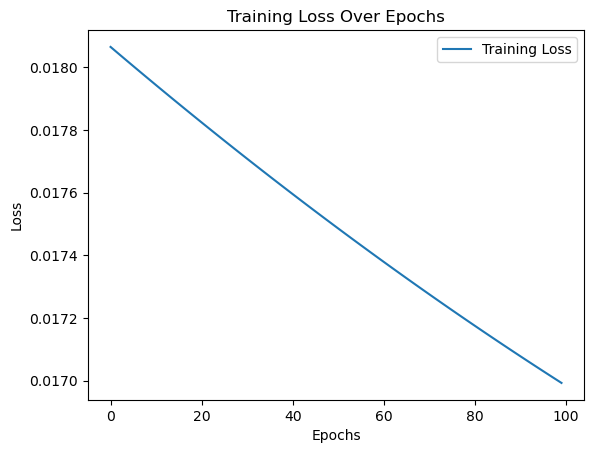

In [56]:
import matplotlib.pyplot as plt

def plot_loss_curve(losses):

    plt.plot(range(epochs), loss_history, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()
    plt.show()

# Your code to plot the loss curve here
plot_loss_curve(loss_history)

**Завдання максимально просте, його основна мета познайомити вас з основами нейронних мереж. Тому не лінуйтесь відкрити посилання, які я вам давав, і дізнаєтесь більше про те, як працюють нейронні мережі.**